# Lab 1: Exploratory Data Analysis and Data Visualization in Python

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import dataset

In [2]:
df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Descriptive statistics

In [6]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [7]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [8]:
df['Sex'].value_counts(normalize = True)*100

Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

### Querying dataset or dataframe

In [9]:
df.iloc[0:15,0:4]

,PassengerId,Survived,Pclass,Name
0,1,0,3,"Braund, Mr. Owen Harris"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,"Heikkinen, Miss. Laina"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,0,3,"Allen, Mr. William Henry"
5,6,0,3,"Moran, Mr. James"
6,7,0,1,"McCarthy, Mr. Timothy J"
7,8,0,3,"Palsson, Master. Gosta Leonard"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)"


### Grouping values

In [10]:
df.groupby(by='Survived')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


In [11]:
df[df['Age']==df[df['Sex']=='male']['Age'].max()]['Name']

630    Barkworth, Mr. Algernon Henry Wilson
Name: Name, dtype: object

### Sorting Value Column

In [12]:
df.sort_values(by = 'Name').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.00,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.00,NaN,C


In [13]:
#replacing male with zero and female with 1 in age column
#replace function
d = {'male': 0, 'female': 1}
df = df.replace(('sex':d))
df['sex'].head()

SyntaxError: invalid syntax (172169360.py, line 4)

### Crosstab

In [14]:
#categorical value
#use cross tab
#find the male and female survived count
pd.crosstab(df['Sex'],df['Survived'],normalize=True)

Survived,0,1
Sex,,
female,0.090909,0.261504
male,0.525253,0.122334


In [15]:
df.groupby(by='Survived')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


In [16]:
df.pivot_table(['Age','Fare'],['Survived'],aggfunc='mean')

,Age,Fare
Survived,,
0,30.626179,22.117887
1,28.343690,48.395408


In [17]:
df.pivot_table(['Age','Fare'],['Survived'],aggfunc='max')

,Age,Fare
Survived,,
0,74.0,263.0000
1,80.0,512.3292


In [18]:
df.pivot_table(['Age','Fare'],['Survived'],aggfunc='min')

,Age,Fare
Survived,,
0,1.00,0.0
1,0.42,0.0


## Data Visualization
### Line Plot

<Axes: xlabel='Age', ylabel='Survived'>

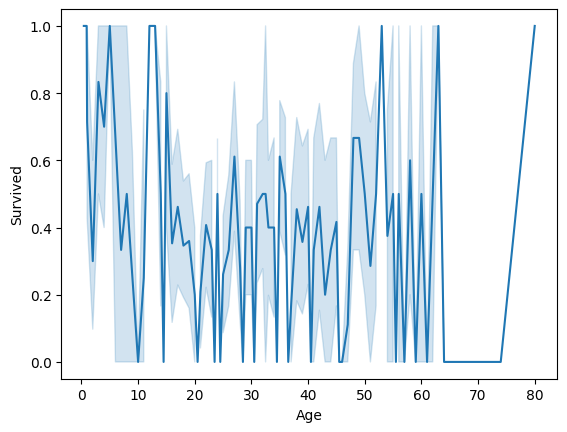

In [19]:
sns.lineplot(x='Age', y='Survived', data= df)

## Bar Graph

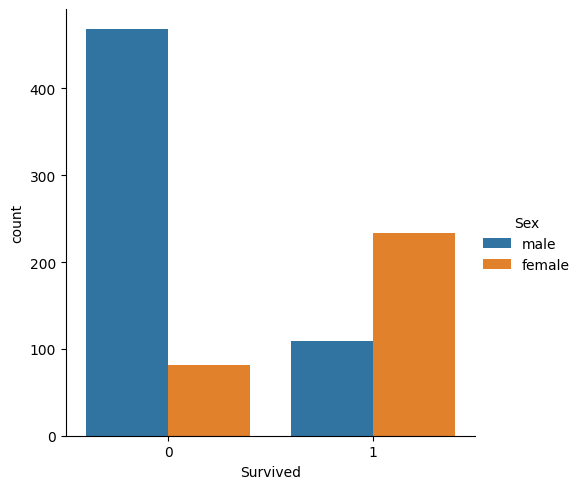

In [20]:
sns.catplot(x='Survived', data=df, kind='count', hue='Sex')

## Histogram

<Axes: >

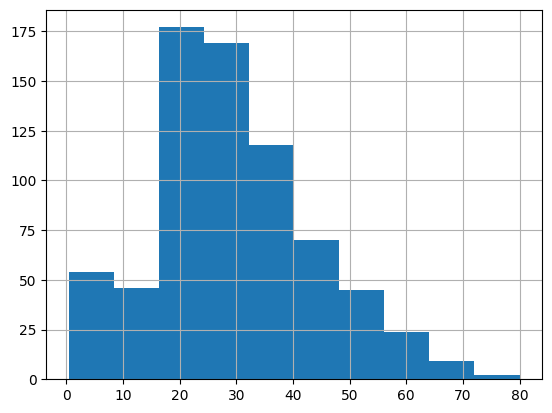

In [21]:
df['Age'].hist(bins=10)

## Piechart

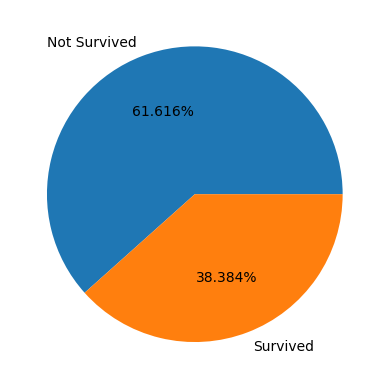

In [22]:
sizes= df['Survived'].value_counts()
sizes
#subplot
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=['Not Survived','Survived'],autopct='%1.3f%%')
plt.show()

## Test Your Knowledge


### 1.Write a query to find the name of passenger whose age is minimum and gender female and write output 



In [ ]:
min_age_female = df[(df['Sex'] == 'female')]['Age'].min()
passenger_name = df[(df['Sex'] == 'female') & (df['Age'] == min_age_female)]['Name'].values[0]
print(passenger_name)


### 2.How many columns contains missing values. Write Name of Columns. 


In [ ]:
missing_columns = df.columns[df.isnull().any()] 
num_missing_columns = len(missing_columns)
print("Number of columns containing missing values:", num_missing_columns) 
df[df.columns[df.isnull().any()]]

### 3.	Write a code to replace categorical values in ‘Embarked’ column to Numerical 

In [ ]:
#import pandas
import pandas as pd
# read csv file
df = pd.read_csv('Titanic.csv')
# replacing values
df['Embarked'].replace(['C','S','Q'],
                        [0, 1, 2], inplace=True) 
df.head()


### 4.	If you want to find the frequency Distribution of any numerical column which is the suitable chart/plot?

In [ ]:
plt.hist(df['Age'], bins=10) 
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Age Column')
plt.show()
